In [186]:
import cv2 
import numpy as np
import PIL
import pickle
from PIL import Image, ImageDraw

In [2]:
# Contornos da face, contornos da orelha, contornos dos olhos, contornos da sombrancelha, contornos da boca, contornos do nariz
def anime_countours(f):
    
    # ABRINDO IMAGEM
    im = cv2.imread(f,0)
    
    # BINARIZAÇÃO COM THRESHHOLD
    im2 = np.full(im.shape,255, dtype = np.uint8)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if im[i][j]<255:
                im2[i][j] = 0
    
    # FINDING COUNTOURS
    contours, hierarchy = cv2.findContours(im2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    """
    face_contours = contours[4]
    left_ear = contours[3]
    right_ear = contours[2]
    mouth = contours[5]
    nose = contours[6]
    right_eye = contours[7]
    left_eye = contours[10]
    right_eyebrow = contours[13]
    left_eyebrow = contours[14]
    """
    return contours
    # (4,3,2,5,6,7,10,13,14)
    #return face_contours, left_ear, right_ear, mouth, nose, right_eye, left_eye, right_eyebrow, left_eyebrow
    
    
    
    

In [3]:
def find_measures(contours):
    
    resp = []
    
    for i in [4,3,2,5,6,7,10,13,14]:     
        x,y,w,h = cv2.boundingRect(contours[i])
        resp.append((x,y,w,h))
    
    return resp


In [4]:
def save_contours(fname):
    im = cv2.imread(fname,0)
    resp = anime_countours(fname)
    rect_measures = find_measures(resp)
    contourz = [resp[i] for i in  [4,3,2,5,6,7,10,13,14]]
    pickle.dump(rect_measures ,open(fname.replace(".png", "")+ "_rect.rect","wb"))
    pickle.dump(contourz,open(fname.replace(".png", "")+ "_cont.contour","wb"))

In [68]:
save_contours("1.png")

In [192]:
fname = '1.png'
# it works well on images 1-4
im = cv2.imread(fname,0)
resp = anime_countours(fname)
for i in [4,3,2,5,6,7,10,13,14]:
    x,y,w,h = cv2.boundingRect(resp[i])
    im = cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),2)
    #im = cv2.drawContours(im, resp, i, (0,255,0), 3)

In [193]:
contourz = [resp[i] for i in  [4,3,2,5,6,7,10,13,14]]

In [194]:
contourz

[array([[[348, 171]],
 
        [[347, 172]],
 
        [[346, 172]],
 
        ..., 
        [[351, 171]],
 
        [[350, 171]],
 
        [[349, 171]]], dtype=int32), array([[[279, 272]],
 
        [[278, 273]],
 
        [[277, 273]],
 
        [[276, 274]],
 
        [[276, 275]],
 
        [[276, 276]],
 
        [[276, 277]],
 
        [[276, 278]],
 
        [[275, 279]],
 
        [[275, 280]],
 
        [[275, 281]],
 
        [[275, 282]],
 
        [[275, 283]],
 
        [[275, 284]],
 
        [[275, 285]],
 
        [[275, 286]],
 
        [[276, 287]],
 
        [[276, 288]],
 
        [[276, 289]],
 
        [[276, 290]],
 
        [[276, 291]],
 
        [[277, 292]],
 
        [[277, 293]],
 
        [[277, 294]],
 
        [[278, 295]],
 
        [[278, 296]],
 
        [[279, 297]],
 
        [[279, 298]],
 
        [[280, 299]],
 
        [[281, 300]],
 
        [[281, 301]],
 
        [[282, 302]],
 
        [[282, 303]],
 
        [[283, 304]],
 
        [[284,

In [191]:
find_measures(resp)

[(283, 171, 157, 198),
 (275, 272, 25, 46),
 (423, 272, 25, 46),
 (349, 337, 25, 4),
 (359, 315, 4, 7),
 (381, 269, 44, 34),
 (298, 269, 44, 34),
 (377, 254, 49, 12),
 (297, 254, 49, 12)]

In [10]:
resp[2]

array([[[467, 270]],

       [[466, 271]],

       [[465, 272]],

       [[465, 273]],

       [[464, 274]],

       [[463, 275]],

       [[463, 276]],

       [[462, 277]],

       [[462, 278]],

       [[462, 279]],

       [[462, 280]],

       [[461, 281]],

       [[461, 282]],

       [[461, 283]],

       [[460, 284]],

       [[460, 285]],

       [[460, 286]],

       [[460, 287]],

       [[459, 288]],

       [[459, 289]],

       [[458, 290]],

       [[458, 291]],

       [[458, 292]],

       [[457, 293]],

       [[457, 294]],

       [[457, 295]],

       [[456, 296]],

       [[456, 297]],

       [[456, 298]],

       [[455, 299]],

       [[455, 300]],

       [[454, 301]],

       [[454, 302]],

       [[454, 303]],

       [[453, 304]],

       [[453, 305]],

       [[453, 306]],

       [[452, 307]],

       [[452, 308]],

       [[451, 309]],

       [[451, 310]],

       [[451, 311]],

       [[450, 312]],

       [[450, 313]],

       [[449, 314]],

       [[4

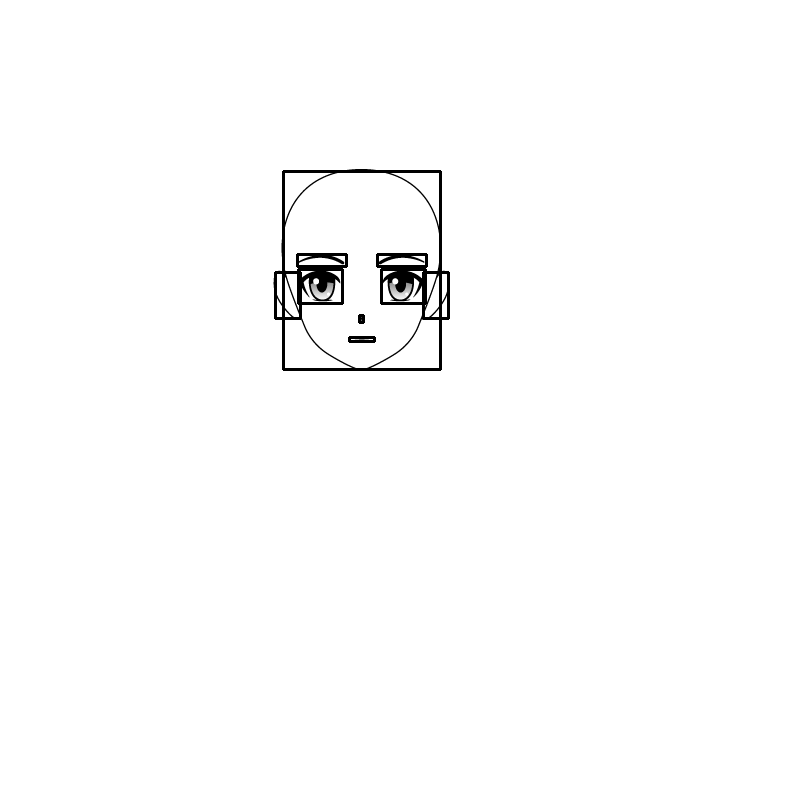

In [195]:
PIL.Image.fromarray(im)

In [175]:
import PIL
img = PIL.Image.open("contorno1.png")
img.paste(righteye, box = (98,98), mask = righteye)
img.paste(lefteye, box = (15,98), mask = lefteye)
#img.paste(rightear, box = (140,101), mask= rightear)

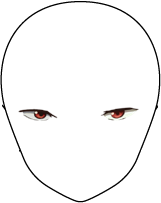

In [176]:
img

In [ ]:
img.

In [171]:
rectz[2]

(423, 272, 25, 46)

In [170]:
rectz[0]

(283, 171, 157, 198)

In [88]:
(rectz[6][2], rectz[5][3])

(44, 34)

In [127]:
rectz[6]

(298, 269, 44, 34)

In [122]:
righteye = PIL.Image.open("right_eye.png")
righteye = righteye.resize(  (44, 34), resample=PIL.Image.BICUBIC)

In [126]:
lefteye = PIL.Image.open("left_eye.png")
lefteye = lefteye.resize(  (44, 34), resample=PIL.Image.BICUBIC)

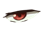

In [123]:
righteye   25, 46

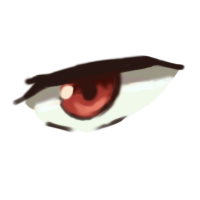

In [106]:
righteye = PIL.Image.open("right_eye.png")
righteye = lefteye.resize(  (44, 34), resample=PIL.Image.BICUBIC)

In [168]:
rightear =  PIL.Image.open("right_ear.png")
rightear = rightear.resize(  ( 25, 46), resample=PIL.Image.BICUBIC)

In [169]:
rightear

In [ ]:
righteye = righteye.resize()

In [56]:
tuple(np.array(np.array(img).shape[0:2])*2)

(406, 322)

In [74]:
rectangles = find_measures(resp)

In [200]:
def position_components( head ,im_shape , scale):
    
    new_im = PIL.Image.new("RGB", im_shape, color=(255,255,255))
    head_img = PIL.Image.open("contorno"+str(head)+".png")
    head_img_shape = np.array(head_img).shape
    
    scale_factor = scale/(head_img_shape[1]) 
    resized_s = (int(head_img_shape[1]*scale_factor), int(head_img_shape[0]*scale_factor))
    head_img = head_img.resize( resized_s, PIL.Image.ANTIALIAS)
    
    rects = pickle.load(open("contornos_template/"+str(head)+ "_rect.rect", "rb"))
    
    head_img_shape = np.array(head_img).shape[0:2]
    
    reference_point = (int((im_shape[0]-head_img_shape[0])/2), int((im_shape[1]-head_img_shape[1])/2))
    
    # Adicionando contorno
    new_im.paste(head_img, box = reference_point, mask = head_img)
    
    # Adicionando olhos
    eye_size = (int(rects[5][2]*scale_factor), int(rects[5][3]*scale_factor))
    right_eye = PIL.Image.open("right_eye.png")
    left_eye = PIL.Image.open("left_eye.png")
    right_eye_resized = right_eye.resize(eye_size,resample=PIL.Image.BICUBIC )
    left_eye_resized = left_eye.resize(eye_size, resample = PIL.Image.BICUBIC)
    
    new_im.paste(right_eye_resized, box = (int((rects[5][0]-rects[0][0])*scale_factor) +reference_point[0],int((rects[5][1]-rects[0][1])*scale_factor)+reference_point[1]),mask = right_eye_resized)
    new_im.paste(left_eye_resized, box = (int((rects[6][0]-rects[0][0])*scale_factor) +reference_point[0],int((rects[6][1]-rects[0][1])*scale_factor)+reference_point[1]), mask = left_eye_resized)
    
    # Adicionando ouvidos 
    ear_size = (int(rects[1][2]*scale_factor), int(rects[1][3]*scale_factor))
    right_ear = PIL.Image.open("right_ear.png")
    left_ear = PIL.Image.open("left_ear.png")
    right_ear_resized = right_ear.resize(ear_size,resample=PIL.Image.BICUBIC )
    left_ear_resized = left_ear.resize(ear_size, resample = PIL.Image.BICUBIC)
    
    #new_im.paste(right_ear_resized, box = (rects[2][0]-rects[0][0]+reference_point[0],rects[2][1]-rects[0][1]+reference_point[1]),mask = right_ear_resized)
    #new_im.paste(left_ear_resized, box = (rects[3][0]-rects[0][0]+reference_point[0],rects[3][1]-rects[0][1]+reference_point[1]), mask = left_ear_resized)
    
    new_im.paste(right_ear_resized, box = (int((rects[2][0]-rects[0][0])*scale_factor) +reference_point[0],int((rects[2][1]-rects[0][1])*scale_factor)+reference_point[1]),mask = right_ear_resized)
    new_im.paste(left_ear_resized, box = (int((rects[1][0]-rects[0][0])*scale_factor) +reference_point[0],int((rects[1][1]-rects[0][1])*scale_factor)+reference_point[1]), mask = left_ear_resized)
   
    # Adicionando nariz
    draw = ImageDraw.Draw(new_im)
    # rects[4]
    draw.line((int((rects[4][0]-rects[0][0])*scale_factor)+int(rects[4][2]*scale_factor) +reference_point[0],int((rects[4][1]-rects[0][1])*scale_factor)+reference_point[1], int((rects[4][0]-rects[0][0])*scale_factor) +reference_point[0],int((rects[4][1]-rects[0][1])*scale_factor)+reference_point[1]+ int(rects[4][3]*scale_factor)), fill=0)
    draw.line((int((rects[4][0]-rects[0][0])*scale_factor) +reference_point[0],int((rects[4][1]-rects[0][1])*scale_factor)+reference_point[1]+ int(rects[4][3]*scale_factor), int((rects[4][0]-rects[0][0])*scale_factor) +reference_point[0]+int(rects[4][2]*scale_factor) ,int((rects[4][1]-rects[0][1])*scale_factor)+reference_point[1]+ int(rects[4][3]*scale_factor)), fill=0)

    
    return new_im
    # Adicionando nariz
    
    

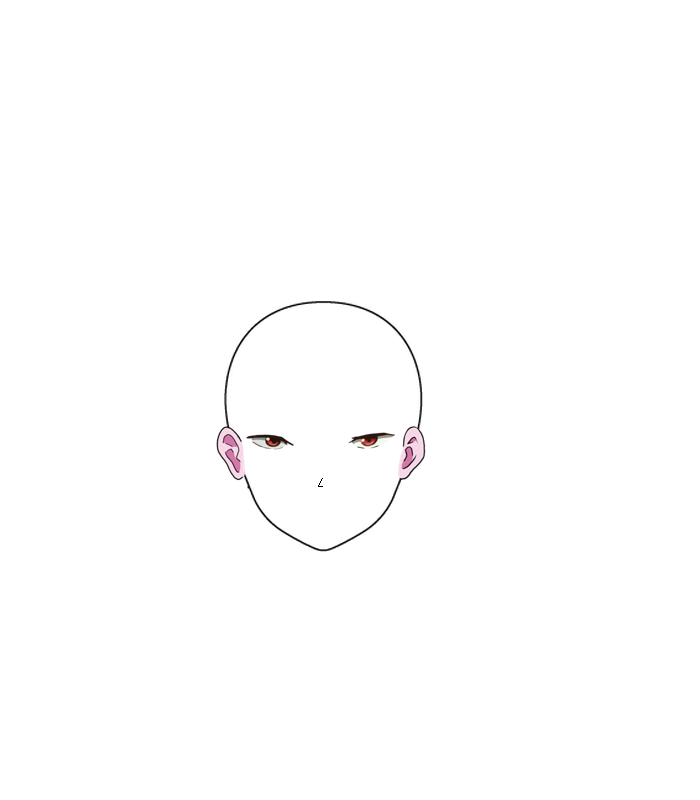

In [201]:
position_components(1, (700,800), 200)

In [64]:
np.array(np.array(img).shape[0:2])

array([203, 161])

In [65]:
s = (323,406)

In [66]:
img = img.resize(s, PIL.Image.ANTIALIAS)

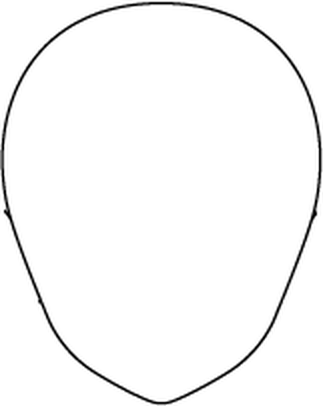

In [67]:
img

In [81]:
righteye = PIL.Image.open("right_eye.png")

In [79]:
import os
os.listdir()

['.ipynb_checkpoints',
 '1.png',
 '1_cont.contour',
 '1_rect.rect',
 '2.png',
 '3.png',
 '4.png',
 '4_cont.contour',
 '4_rect.rect',
 '5.png',
 '6.png',
 'contorno1.png',
 'contorno2.png',
 'contorno3.png',
 'contorno4.png',
 'contornos_template',
 'contorno_binarizado.png',
 'contorno_binarizado_2.png',
 'Finding contours.ipynb',
 'retangulos.png']

In [177]:
mouth = pickle.load(open("mouth.pkl", "rb"))

In [178]:
mouth

[(221.275, 428.12500000000006),
 (212.82500000000002, 428.77500000000003),
 (204.375, 427.475),
 (212.82500000000002, 433.52500000000003)]